In [223]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Step 1. Open the data file and study the general information

In [224]:
calls_df = pd.read_csv('./datasets/moved_megaline_calls.csv')
internet_df = pd.read_csv('./datasets/moved_megaline_internet.csv')
messages_df = pd.read_csv('./datasets/moved_megaline_messages.csv')
plans_df = pd.read_csv('./datasets/moved_megaline_plans.csv')
users_df = pd.read_csv('./datasets/moved_megaline_users.csv')


## Step 2. Prepare the data

### Calls

In [225]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
# we want to round up all the calls to the minute since Megaline counts a whole minute even if a call was lasting for just a second
calls_df['duration'] =np.ceil(calls_df['duration'])
calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


<AxesSubplot: ylabel='Frequency'>

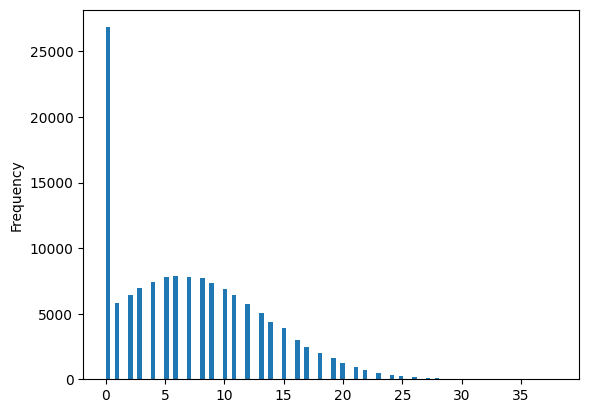

In [188]:
calls_df['duration'].plot(kind='hist', bins=100)

For some reason a lot of call duration is 0.0. May be these are missing calls.

In [189]:
calls_df['month'] = calls_df['call_date'].dt.month

number_of_calls_by_user_per_month = calls_df.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='count', fill_value=0)
number_of_calls_by_user_per_month = number_of_calls_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

number_of_calls_by_user_per_month.columns = pd.to_datetime(number_of_calls_by_user_per_month.columns, format='%m').strftime('%b')
number_of_calls_by_user_per_month

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,27,49,65,64,56
1002,0,0,0,0,0,0,0,0,0,11,55,47
1003,0,0,0,0,0,0,0,0,0,0,0,149
1004,0,0,0,0,21,44,49,49,42,61,54,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,52,75,61,65
1496,0,0,0,0,0,0,0,18,52,46,39,40
1497,0,0,0,0,0,0,0,0,0,0,0,54


In [190]:
duration_of_calls_by_user_per_month = calls_df.pivot_table(index='user_id', columns=['month'], values='duration', aggfunc='sum', fill_value=0)
duration_of_calls_by_user_per_month = duration_of_calls_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

duration_of_calls_by_user_per_month.columns = pd.to_datetime(duration_of_calls_by_user_per_month.columns, format='%m').strftime('%b')
duration_of_calls_by_user_per_month

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124
1001,0,0,0,0,0,0,0,182,315,393,426,412
1002,0,0,0,0,0,0,0,0,0,59,386,384
1003,0,0,0,0,0,0,0,0,0,0,0,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,302,610,361,492
1496,0,0,0,0,0,0,0,122,414,317,308,294
1497,0,0,0,0,0,0,0,0,0,0,0,300


### Internet

In [191]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['month'] = internet_df['session_date'].dt.month

internet_df.info()
internet_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,month
102423,1490_238,1490,2018-10-15,373.01,10
12472,1060_181,1060,2018-09-14,875.38,9
91959,1426_53,1426,2018-12-29,627.48,12
42208,1187_385,1187,2018-09-20,132.80,9
64201,1294_122,1294,2018-10-29,397.70,10


In [192]:
internet_by_user_per_month = internet_df.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum', fill_value=0)
internet_by_user_per_month = internet_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)
internet_by_user_per_month.columns = pd.to_datetime(internet_by_user_per_month.columns, format='%m').strftime('%b')

internet_by_user_per_month

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47
1001,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18
1002,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24
1003,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14
1004,0.0,0.00,0.00,0.00,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22981.37,26899.41,24912.78,24097.40
1496,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8605.66,16389.27,14287.36,8547.36,16438.99
1497,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11106.55


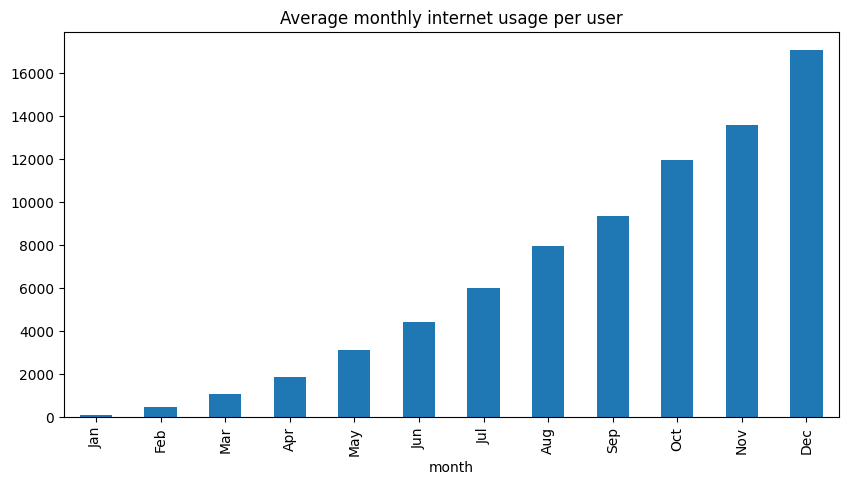

In [193]:
internet_by_user_per_month.mean().plot(kind='bar', figsize=(10, 5), title='Average monthly internet usage per user')
plt.show()

Data usage grows through the year. May be it is because the company is growing.

### Messages

In [194]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

messages_df.info()
messages_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
58331,1369_132,1369,2018-12-27
24196,1145_51,1145,2018-07-11
9284,1069_42,1069,2018-12-03
44214,1293_1181,1293,2018-10-06
57006,1362_72,1362,2018-05-25


In [195]:
messages_by_user_per_month = messages_df
messages_by_user_per_month['month'] = messages_df['message_date'].dt.month
messages_by_user_per_month = messages_by_user_per_month.pivot_table(index='user_id', columns='month', values='message_date', aggfunc='count', fill_value=0)
messages_by_user_per_month = messages_by_user_per_month.reindex(users_df['user_id'].unique(), fill_value=0)

messages_by_user_per_month.columns = pd.to_datetime(messages_by_user_per_month.columns, format='%m').strftime('%b')

messages_by_user_per_month

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41
1003,0,0,0,0,0,0,0,0,0,0,0,50
1004,0,0,0,0,7,18,26,25,21,24,25,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,2,21,18,13,11
1497,0,0,0,0,0,0,0,0,0,0,0,50


### Plans

In [196]:
plans_df['plan_name'] = plans_df['plan_name'].astype('category')

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users

In [197]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['plan'] = users_df['plan'].astype('category')

users_df.info()
users_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaN
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaN


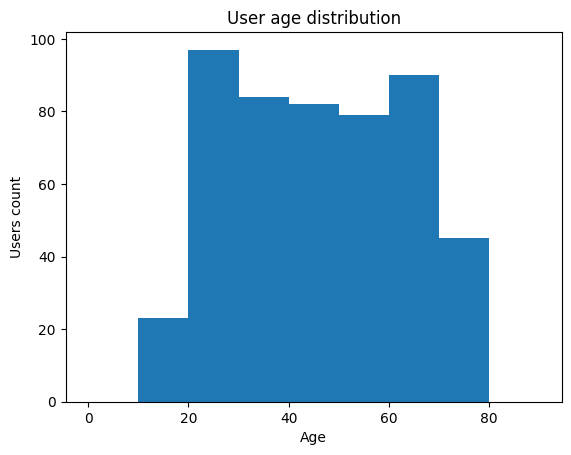

In [198]:
users_age_plot = users_df['age'].plot(kind='hist', bins=range(0, 100, 10), title='User age distribution')
users_age_plot.set_xlabel('Age')
users_age_plot.set_ylabel('Users count')
plt.show()

In [214]:
# The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)
months = pd.to_datetime(range(1, 13), format='%m').strftime('%b') 

monthly_user_revenue = pd.DataFrame(index=users_df['user_id'], columns=months)
monthly_user_revenue.fillna(0, inplace=True)

monthly_user_revenue

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,0,0
